In [2]:
import numpy as np
import pandas as pd
import json
import googlemaps
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load asset data
df = pd.read_csv('land_use.csv')

In [4]:
# Read api_keys from json file
with open('credentials.json') as json_data:
    credentials = json.load(json_data)
gmaps_api_key = credentials['gmaps_api_key']

In [5]:
df

,Station,Distance,Year,Population,Employment,Total
0,Transbay,0.5,2016,"10,418","225,227","235,645"
1,4th and King,0.5,2016,"10,169","30,367","40,536"
2,22nd St,0.5,2016,"8,271","7,755","16,026"
3,Bayshore,0.5,2016,"6,988","1,559","8,546"
4,South San Francisco,0.5,2016,"5,466","8,232","13,698"
5,San Bruno,0.5,2016,"7,122","4,335","11,457"
6,Millbrae,0.5,2016,"4,660","7,895","12,555"
7,Broadway,0.5,2016,"3,520","4,409","7,929"
8,Burlingame,0.5,2016,"9,184","6,784","15,968"
9,San Mateo,0.5,2016,"12,273","8,781","21,055"


In [6]:
gmaps = googlemaps.Client(key=gmaps_api_key)
def get_lat_lng(row):
    
    address = row['Station'] + ' Caltrain station, California'

    try:
        geocode_result = gmaps.geocode(address)
        lat = geocode_result[0]['geometry']['location']['lat']
        lng = geocode_result[0]['geometry']['location']['lng']
        print (address + ' is at ' + str(lat) + ', ' + str(lng))
        
    except Exception as e:
        print(address)
        print(e)
        lat = np.NaN
        lng = np.NaN
        
    return lat, lng

In [7]:
df['lat'], df['lng'] = zip(*df.apply(get_lat_lng, axis=1))

Transbay Caltrain station, California is at 37.7889543, -122.3972246
4th and King Caltrain station, California is at 37.7766874, -122.394857
22nd St Caltrain station, California is at 37.7573859, -122.3928981
Bayshore Caltrain station, California is at 37.7076791, -122.4018319
South San Francisco Caltrain station, California is at 37.6558673, -122.4052008
San Bruno Caltrain station, California is at 37.6377946, -122.416301
Millbrae Caltrain station, California is at 37.6001863, -122.3868224
Broadway Caltrain station, California is at 37.5875333, -122.3627322
Burlingame Caltrain station, California is at 37.5799379, -122.3450469
San Mateo Caltrain station, California is at 37.6377946, -122.416301
Hayward Park Caltrain station, California is at 37.5531106, -122.309706
Hillsdale Caltrain station, California is at 37.5384336, -122.2980147
Belmont Caltrain station, California is at 37.5212913, -122.2763428
San Carlos Caltrain station, California is at 37.5065453, -122.2591686
Redwood City C

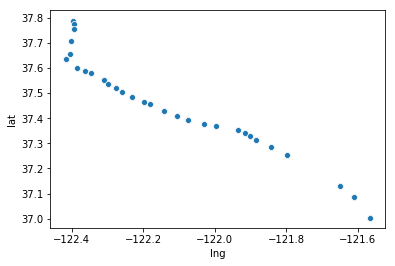

In [41]:
sns.scatterplot(x=df['lng'], y=df['lat'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
Station       128 non-null object
Distance      128 non-null float64
Year          128 non-null int64
Population    128 non-null int64
Employment    128 non-null int64
Total         128 non-null int64
lat           128 non-null float64
lng           128 non-null float64
dtypes: float64(3), int64(4), object(1)
memory usage: 8.1+ KB


In [16]:
df['Population'] = df['Population'].str.replace(',', '').astype('int')
df['Employment'] = df['Employment'].str.replace(',', '').astype('int')
df['Total'] = df['Total'].str.replace(',', '').astype('int')

In [18]:
df.to_csv('land_use_lat_lng.csv', index=False)